<a href="https://colab.research.google.com/github/MSURENDRAN/AIML_Machine_Learning_Lab/blob/main/2348527_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df=pd.read_csv('/content/Market_Basket_Optimisation.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
5766,mineral water,chicken,yogurt cake,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6600,cereals,french fries,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300,grated cheese,frozen vegetables,mineral water,soup,vegetables mix,pancakes,cooking oil,carrots,french fries,escalope,mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5692,grated cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5654,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,fresh bread,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,energy bar,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4293,energy drink,mayonnaise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4165,spaghetti,black tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4540,turkey,spaghetti,eggs,honey,french fries,champagne,pancakes,protein bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

Data Preprocessing

In [3]:
df=df.fillna(value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            7500 non-null   object 
 2   avocado            7500 non-null   object 
 3   vegetables mix     7500 non-null   object 
 4   green grapes       7500 non-null   object 
 5   whole weat flour   7500 non-null   object 
 6   yams               7500 non-null   object 
 7   cottage cheese     7500 non-null   object 
 8   energy drink       7500 non-null   object 
 9   tomato juice       7500 non-null   object 
 10  low fat yogurt     7500 non-null   object 
 11  green tea          7500 non-null   object 
 12  honey              7500 non-null   object 
 13  salad              7500 non-null   object 
 14  mineral water      7500 non-null   object 
 15  salmon             7500 non-null   object 
 16  antioxydant juice  7500 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,olive oil
count,7500.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [5]:
data=df.drop(columns = ['olive oil'])
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
transactions = []
for i in range(0,data.shape[0]):
    transactions.append([str(data.values[i,j])for j in range(0,data.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(transactions)

[['burgers', 'meatballs', 'eggs', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['chutney', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['turkey', 'avocado', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['low fat yogurt', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['whole wheat pasta', 'french fries', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['soup', 'light cream', 'shallot', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['frozen vegetables', 'spaghetti', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['french fries', '0', '0', '0', '0', '0', '0', '0',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 19)

In [8]:
transactions = []

for i in range(0, data.shape[0]):
    transaction = [str(data.values[i, j]) for j in range(0, data.shape[1]) if str(data.values[i, j]) != '0']
    transactions.append(transaction)

print(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

In [9]:
unique_items_set = set()
for transaction in transactions:
    unique_items_set.update(item for item in transaction)
unique_items_list = list(unique_items_set)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
print(unique_items_set)
len(unique_items_list)


{'tea', 'nonfat milk', 'light cream', 'chili', 'rice', 'french fries', 'pepper', 'shrimp', 'oatmeal', 'bacon', 'vegetables mix', 'bramble', 'black tea', 'bug spray', 'tomato juice', 'cream', 'light mayo', 'soup', 'fresh bread', 'ketchup', 'cookies', 'hot dogs', 'herb & pepper', 'asparagus', 'frozen vegetables', 'meatballs', 'mineral water', 'olive oil', 'blueberries', 'pasta', 'salt', 'gluten free bar', 'babies food', 'chicken', 'red wine', 'chocolate bread', 'chocolate', 'shampoo', 'pet food', 'parmesan cheese', 'fromage blanc', 'green beans', 'cooking oil', 'grated cheese', 'mushroom cream sauce', 'tomatoes', 'yams', 'water spray', 'milk', 'yogurt cake', 'toothpaste', 'clothes accessories', 'strong cheese', 'cauliflower', 'green tea', 'whole wheat pasta', 'dessert wine', 'honey', 'napkins', 'energy bar', 'almonds', 'fresh tuna', 'mint green tea', 'ham', 'sparkling water', 'strawberries', 'spinach', 'cereals', 'hand protein bar', 'mayonnaise', 'flax seed', 'brownies', 'low fat yogurt'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


120

Converting data into Binary Matrix Format

In [ ]:
binary_matrix = pd.DataFrame(columns=unique_items_list)

# Populate the DataFrame with binary values using pandas.concat
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     mushroom cream sauce cookies mint green tea fromage blanc water spray  \
0                       0       0              0             0           0   
1                       0       0              0             0           0   
2                       0       0              0             0           0   
3                       0       0              0             0           0   
4                       0       0              0             0           0   
...                   ...     ...            ...           ...         ...   
7495                    0       0              0             0           0   
7496                    0       0              0             0           0   
7497                    0       0              0             0           0   
7498                    0       0              0             0           0   
7499                    0       0              0             0           0   

     pepper eggs parmesan cheese rice green tea  ... green grap

In [ ]:
top10=binary_matrix.sum().sort_values(ascending=False)[:10]
top10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: object

EDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


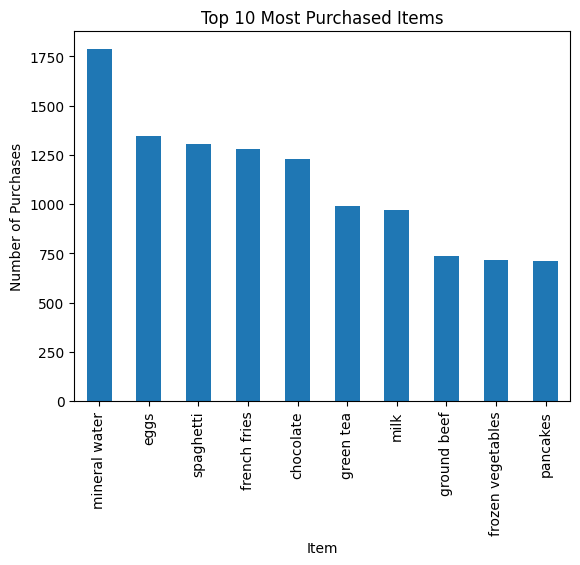

In [ ]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [ ]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 asparagus          1
water spray         3
napkins             5
cream               7
bramble            14
tea                29
chutney            31
mashed potato      31
chocolate bread    32
dessert wine       33
dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


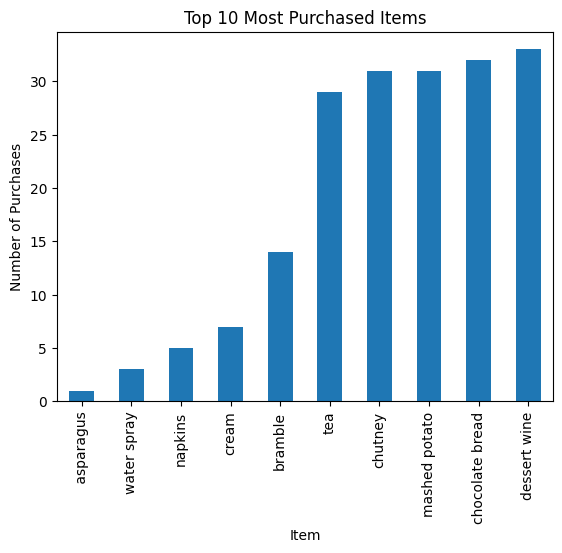

In [ ]:
bottom10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Last 10 Least Purchased Items")
plt.show()

Association Rule Mining

In [ ]:
frequent_itemset = apriori(binary_matrix,min_support=0.06,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
basket=pd.DataFrame(binary_matrix)
frequent_itemset = apriori(basket,min_support=0.03,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules.head()
rules[(rules['confidence']>0.2) & (rules['lift']>1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(milk),(eggs),0.129600,0.179733,0.030800,0.237654,1.322261,0.007507,1.075977,0.280009
2,(eggs),(spaghetti),0.179733,0.174133,0.036533,0.203264,1.167290,0.005236,1.036563,0.174717
3,(spaghetti),(eggs),0.174133,0.179733,0.036533,0.209801,1.167290,0.005236,1.038051,0.173533
5,(chocolate),(eggs),0.163867,0.179733,0.033200,0.202604,1.127246,0.003748,1.028681,0.135005
6,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
7,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004
8,(french fries),(eggs),0.170933,0.179733,0.036400,0.212949,1.184803,0.005678,1.042202,0.188136
9,(eggs),(french fries),0.179733,0.170933,0.036400,0.202522,1.184803,0.005678,1.039611,0.190155
10,(spaghetti),(milk),0.174133,0.129600,0.035467,0.203675,1.571569,0.012899,1.093022,0.440378
11,(milk),(spaghetti),0.129600,0.174133,0.035467,0.273663,1.571569,0.012899,1.137029,0.417846


In [ ]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','lift']])

Worst choice to buy items together
            antecedents          consequents      lift
4                (eggs)          (chocolate)  1.127246
5           (chocolate)               (eggs)  1.127246
2                (eggs)          (spaghetti)  1.167290
3           (spaghetti)               (eggs)  1.167290
8        (french fries)               (eggs)  1.184803
9                (eggs)       (french fries)  1.184803
6                (eggs)      (mineral water)  1.189351
7       (mineral water)               (eggs)  1.189351
26       (french fries)          (chocolate)  1.228121
27          (chocolate)       (french fries)  1.228121
0                (eggs)               (milk)  1.322261
1                (milk)               (eggs)  1.322261
25          (chocolate)      (mineral water)  1.348907
24      (mineral water)          (chocolate)  1.348907
16          (spaghetti)          (chocolate)  1.373768
17          (chocolate)          (spaghetti)  1.373768
18      (mineral water)       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
            antecedents          consequents  confidence      lift
29        (ground beef)      (mineral water)    0.416554  1.748266
21        (ground beef)          (spaghetti)    0.398915  2.290857
31  (frozen vegetables)      (mineral water)    0.374825  1.573133
15               (milk)      (mineral water)    0.370370  1.554436
23           (pancakes)      (mineral water)    0.354839  1.489250
19          (spaghetti)      (mineral water)    0.343032  1.439698
25          (chocolate)      (mineral water)    0.321400  1.348907
6                (eggs)      (mineral water)    0.283383  1.189351
11               (milk)          (spaghetti)    0.273663  1.571569
18      (mineral water)          (spaghetti)    0.250699  1.439698
12               (milk)          (chocolate)    0.247942  1.513074
17          (chocolate)          (spaghetti)    0.239219  1.373768
1                (milk)               (eggs)    0.237654  1.322261
20          (spaghetti)     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top=best_choice.head(10)
print(top)

            antecedents      consequents  antecedent support  \
29        (ground beef)  (mineral water)            0.098267   
21        (ground beef)      (spaghetti)            0.098267   
31  (frozen vegetables)  (mineral water)            0.095333   
15               (milk)  (mineral water)            0.129600   
23           (pancakes)  (mineral water)            0.095067   
19          (spaghetti)  (mineral water)            0.174133   
25          (chocolate)  (mineral water)            0.163867   
6                (eggs)  (mineral water)            0.179733   
11               (milk)      (spaghetti)            0.129600   
18      (mineral water)      (spaghetti)            0.238267   

    consequent support   support  confidence      lift  leverage  conviction  \
29            0.238267  0.040933    0.416554  1.748266  0.017520    1.305576   
21            0.174133  0.039200    0.398915  2.290857  0.022088    1.373959   
31            0.238267  0.035733    0.374825  1.573133 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


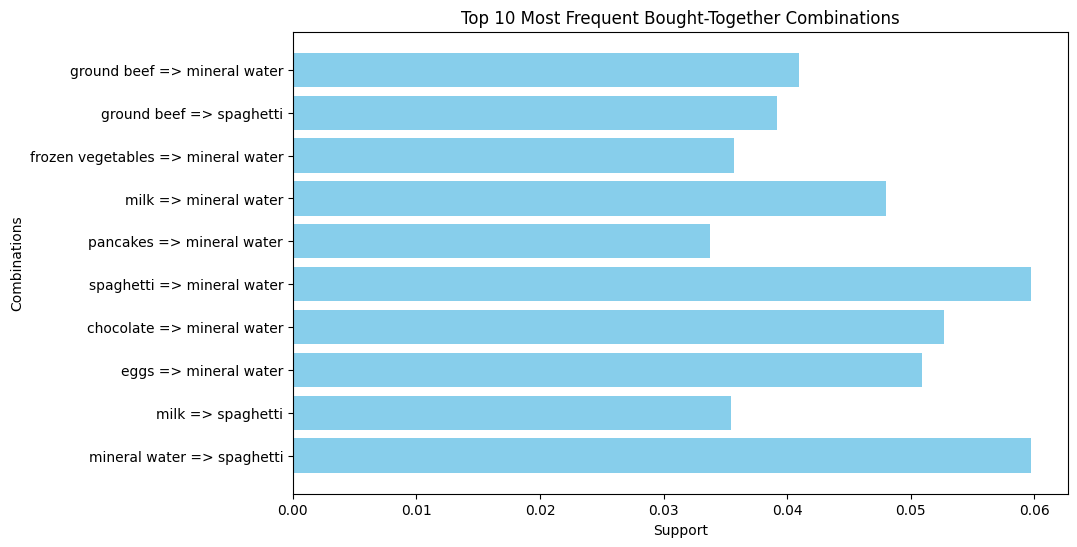

In [ ]:
# Extract antecedents and consequents
antecedents = top['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = top['consequents'].apply(lambda x: ', '.join(list(x)))

# Combine antecedents and consequents for the bar labels
bar_labels = antecedents + ' => ' + consequents

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(bar_labels, top['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Combinations')
plt.title('Top 10 Most Frequent Bought-Together Combinations')
plt.gca().invert_yaxis()
# Invert y-axis to have the highest support at the top
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


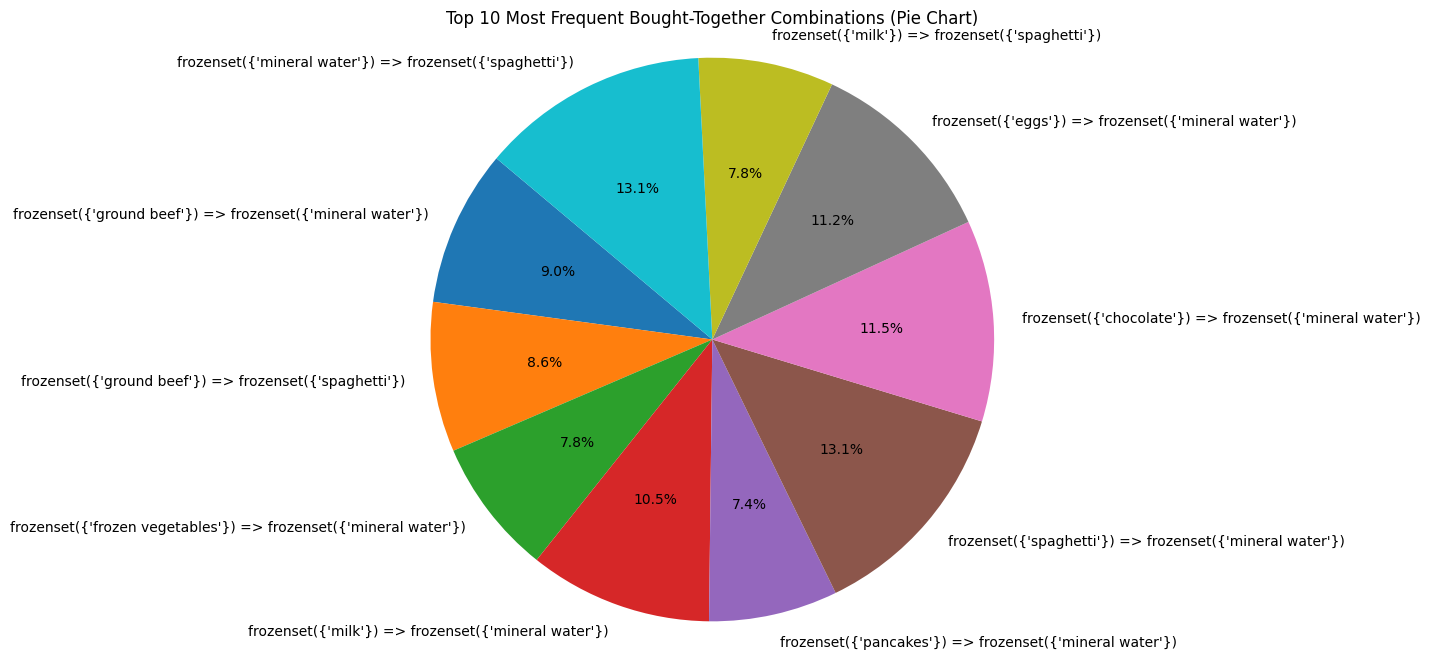

In [ ]:
# Sample data (replace with your actual data)
top10 = best_choice.head(10)
combinations = [' => '.join(map(str, combination)) for combination in zip(top10['antecedents'], top10['consequents'])]
support_values = top10['support']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(support_values, labels=combinations, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most Frequent Bought-Together Combinations (Pie Chart)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


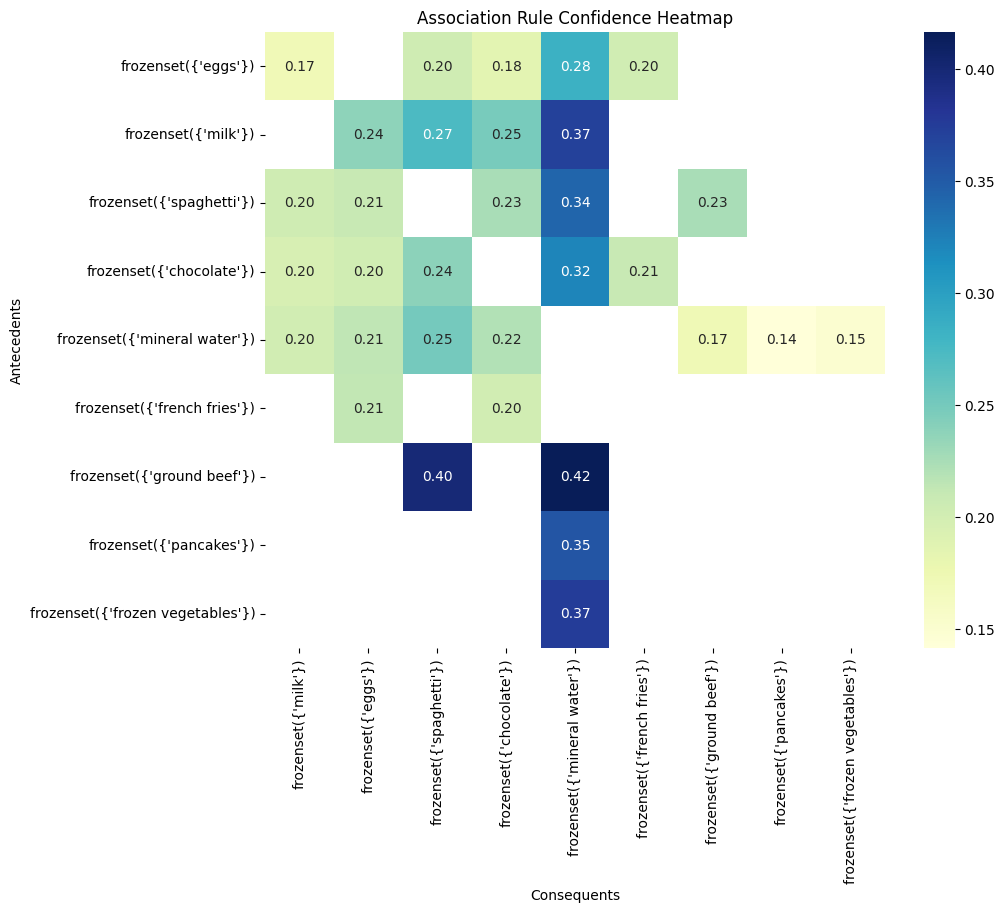

In [ ]:
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='confidence')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Association Rule Confidence Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


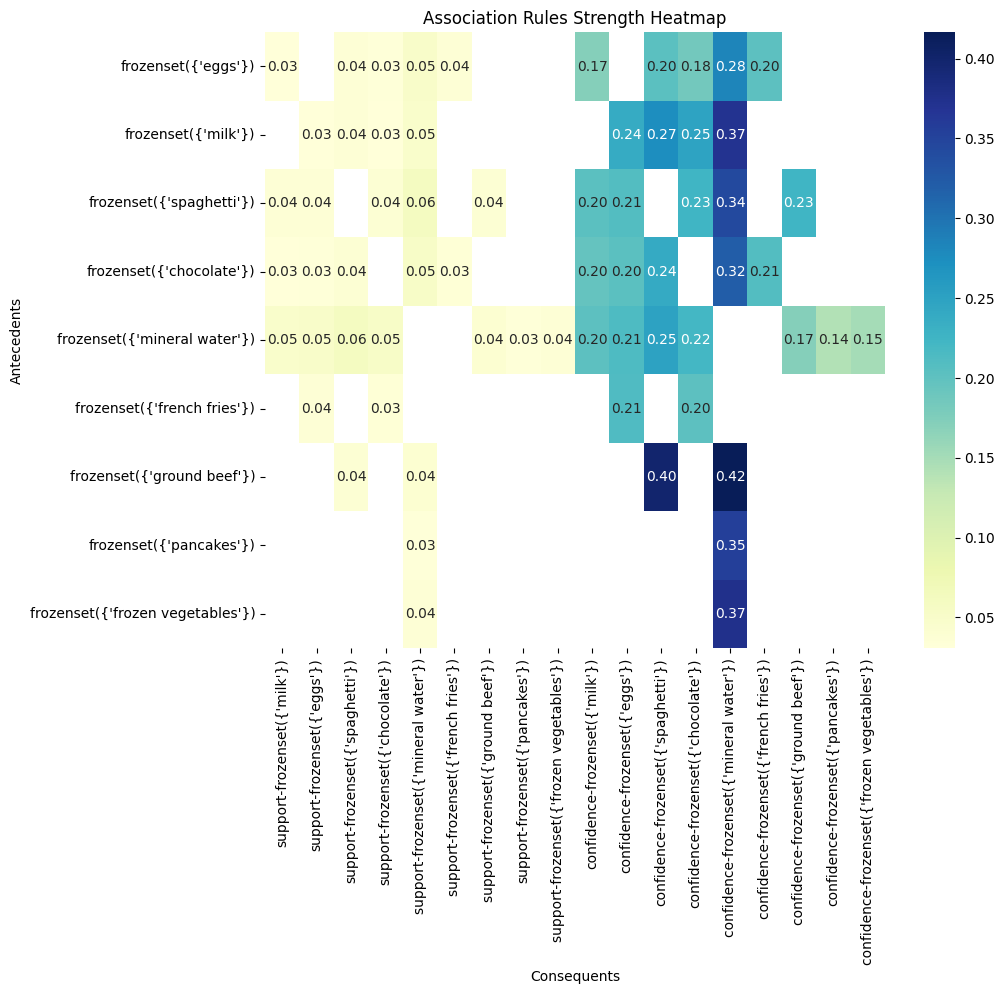

In [ ]:
rules['antecedent support'] = rules['antecedents'].apply(
    lambda x: frequent_itemset[frequent_itemset['itemsets'] == x]['support'].values[0]
)
rules['confidence'] = rules['support'] / rules['antecedent support']

# Prepare data for the heatmap
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values=['support', 'confidence'])

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Association Rules Strength Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


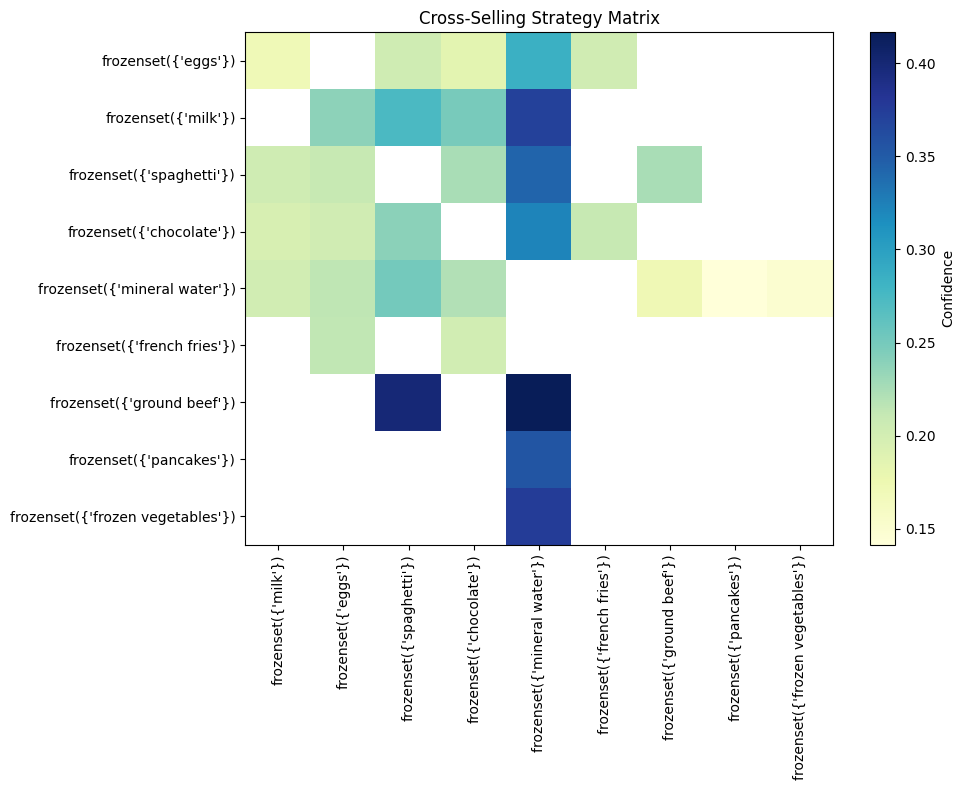

In [ ]:
matrix_df = rules.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the matrix plot
plt.figure(figsize=(10, 8))
plt.imshow(matrix_df, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Confidence')
plt.xticks(range(len(matrix_df.columns)), matrix_df.columns, rotation=90)
plt.yticks(range(len(matrix_df.index)), matrix_df.index)
plt.title('Cross-Selling Strategy Matrix')
plt.tight_layout()

plt.show()

In [ ]:
for i in range(5):
    customer_purchase_history = rules["combinations"].tolist()[i]
    recommended_items = rules[rules['combinations'].apply(lambda x: customer_purchase_history in x)]
    print("Recommended items for customer who purchased:", customer_purchase_history)
    print(recommended_items['combinations'].tolist())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(["Before", "After"], [revenue_before, revenue_after])
plt.xlabel("Time Period")
plt.ylabel("Revenue")
plt.title("Cross-Selling Performance Metrics")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

<Figure size 1000x500 with 0 Axes>